In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
def parser(url, headers):
    # requests + BeautifulSoup
    html = requests.get(url, headers=headers, timeout=10)
    html_text = html.content
    #print(html_text)
    soup = BeautifulSoup(html_text, 'html.parser', from_encoding='utf-8')
    return soup

In [3]:
def analysis(soup, df):
    temp = soup.find('div', class_='tslb_b')
    tr_list = temp.findAll('tr')
    for tr in tr_list:
        td_list = tr.findAll('td')
        temp = {}
        if len(td_list)>0:
            id, brand, car_model, type, desc, problem, datetime, status = td_list[0].text, td_list[1].text, td_list[2].text,td_list[3].text,td_list[4].text,td_list[5].text,td_list[6].text,td_list[7].text
            temp['id'],temp['brand'],temp['car_model'],temp['type'],temp['desc'],temp['problem'],temp['datetime'], temp['status'] = id, brand, car_model, type, desc, problem, datetime, status
            df = df.append(temp, ignore_index=True)
    return df       

In [4]:
# F12 --> Network --> name --> headers --> User-Agent
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36"}
base_url = 'http://www.12365auto.com/zlts/0-0-0-0-0-0_0-0-'
num_pages = 1    
df = pd.DataFrame(columns=['id', 'brand', 'car_model', 'type', 'desc', 'problem', 'datetime', 'status'])

for num_page in range(1,num_pages+1):
    url = base_url + str(num_page) + '.shtml'
    soup = parser(url, headers)
    df =analysis(soup, df)
    
print(df)
df.to_csv('car_complain.csv', index=False, encoding='utf-8-sig')

        id   brand      car_model                         type  \
0   514314   奇瑞新能源          奇瑞eQ1     2019款 小蚂蚁 智享版 4座 30.6kWh   
1   514307    众泰汽车         众泰E200                    2018款 Pro   
2   514306    上汽大众             途观   2016款 280TSI 自动 两驱 丝绸之路舒适版   
3   514304    东风日产             阳光        2011款 1.5L CVT XE 舒适版   
4   514303    广汽丰田            凯美瑞            2019款 改款 2.5G 豪华版   
5   514301    华晨宝马           宝马X1         2016款 sDrive18Li 尊享型   
6   514296    江淮汽车           瑞风S3        2016款 1.5L 手动 豪华智能尊享版   
7   514293    华晨宝马           宝马1系               2018款 118i 运动型   
8   514291   沃尔沃亚太        沃尔沃XC40           2020款 T4 四驱 智远 运动版   
9   514288    上汽大众             途岳  2020款 280TSI 两驱 豪华版PLUS 国VI   
10  514287   一汽-大众             探岳       2019款 330TSI 四驱 豪华型 国Ⅵ   
11  514286   一汽-大众             迈腾      2019款 330TSI DSG 领先型 国V   
12  514278    吉利汽车           帝豪GL            2017款 1.8L 手动 精英型   
13  514276   一汽-大众             探岳        2020款 330TSI 两驱 豪华智联版   
14  514268

### screenshot of car_complain.csv

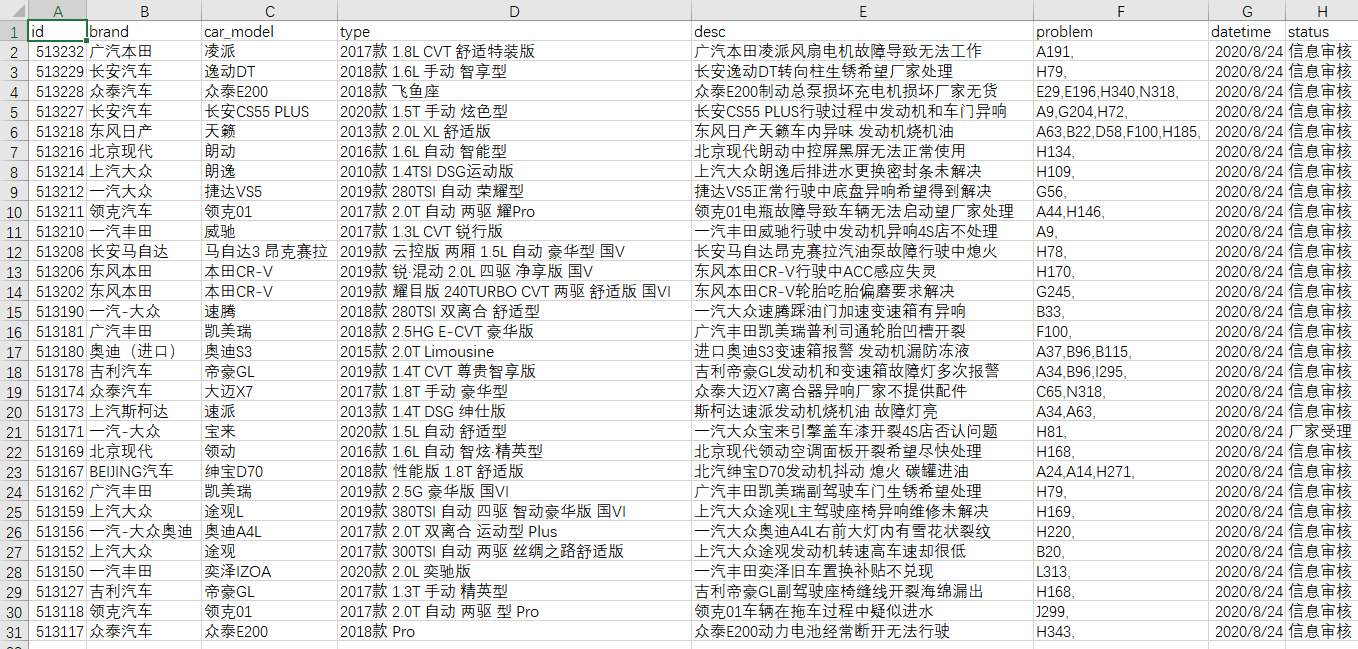